In [171]:
using Dates

module M
using Dates

@enum State begin
    TooEarly #white
    Early #blue
    Good #green
    Okay #yellow
    Late #orange
    Latest #red
    TooLate #black
end

emojis = [
    ['⚪', '💜', '🥚'], 
    ['🔵', '💙', '📘'], 
    ['🟢', '💚', '📗'], 
    ['🟡', '💛', '🌕', '📔', '📒'], 
    ['🟠', '🧡', '📙'], 
    ['🔴','❤', '♥', '🛑', '📕'], 
    ['⚫', '🖤'],
]

BasePeriod = Minute
#BasePeriod = Second # for testing

mutable struct FuzzyTimer
    name::String
    start::Union{DateTime, Nothing}
    
    too_early::BasePeriod
    early::BasePeriod
    good::BasePeriod
    okay::BasePeriod
    late::BasePeriod
    latest::BasePeriod
    too_late::BasePeriod
    
    inverted::Bool
    
    FuzzyTimer(good::Period, latest::Period; name="Timer") = begin
        good = BasePeriod(good)
        latest = BasePeriod(latest)
        interval = (latest - good) / 3 # 3 steps between: Good, Okay, Late
        
        too_early = good - 2interval
        early     = good - 1interval
        
        okay      = good + 1interval
        late      = latest - 1interval
        
        too_late  = latest + 1interval
        
        new(name, nothing, too_early, early, good, okay, late, latest, too_late)
    end  
    
    FuzzyTimer(good::Time, latest::Time; name="Timer") = begin
        interval = BasePeriod(latest - good) / 3 # 3 steps between: Good, Okay, Late
        start = DateTime(today(), good - 3interval)
        
        too_early = 1interval
        early     = 2interval
        good      = 3interval
        okay      = 4interval
        late      = 5interval
        latest    = 6interval
        too_late  = 7interval
        
        new(name, start, too_early, early, good, okay, late, latest, too_late)
    end
end

function start(timer::FuzzyTimer)
    timer.start = now()
end

function state(timer::FuzzyTimer, now=now())::State
    @assert timer.start !== nothing
    elapsed = now - timer.start
    if elapsed < timer.early
        TooEarly
    elseif elapsed < timer.good
        Early
    elseif elapsed < timer.okay
        Good
    elseif elapsed < timer.late
        Okay
    elseif elapsed < timer.latest
        Late
    elseif elapsed < timer.too_late
        Latest
    else
        TooLate
    end
end

function remaining_in_state(timer::FuzzyTimer, now=now())::BasePeriod
    @assert timer.start !== nothing
    elapsed = round(now - timer.start, BasePeriod)
    if elapsed < timer.early
        timer.early - elapsed
    elseif elapsed < timer.good
        timer.good - elapsed
    elseif elapsed < timer.okay
        timer.okay - elapsed
    elseif elapsed < timer.late
        timer.late - elapsed
    elseif elapsed < timer.latest
        timer.latest - elapsed
    elseif elapsed < timer.too_late
        timer.too_late - elapsed
    else
        BasePeriod(0)
    end
end

end

t = M.FuzzyTimer(Minute(60), Hour(2))
display(t)
t2 = M.FuzzyTimer(Time(11), Time(12))
#t, t2
# M.start(t)
# M.state(t) |> display
# M.state(t, now() + Minute(50)) |> display
# M.state(t, now() + Minute(60)) |> display
# M.state(t, now() + Minute(100)) |> display

# M.remaining_in_state(t, now() + Minute(61))

Main.M.FuzzyTimer("Timer", nothing, 20 minutes, 40 minutes, 60 minutes, 80 minutes, 100 minutes, 120 minutes, 140 minutes, false)

TooEarly::State = 0

Early::State = 1

Good::State = 2

Late::State = 4

19 minutes

In [172]:
using Plots

In [173]:
gr()

Plots.GRBackend()

In [174]:
?bar

search: bar barh bar! barh! barhist barhist! baremodule SubArray GlobalRef



```
bar(x,y)
bar!(x,y)
```

Make a bar plot of y vs x.

# Arguments

  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Examples

```julia-repl
julia> bar([1,2,3],[4,5,6],fillcolor=[:red,:green,:blue],fillalpha=[0.2,0.4,0.6])
julia> bar([(1,4),(2,5),(3,6)])
```


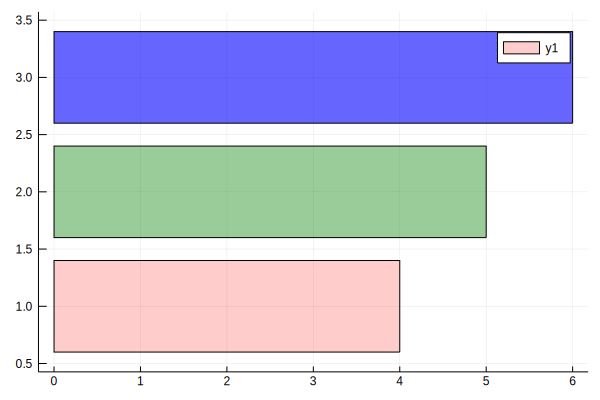

In [179]:
bar([1,2,3],[4,5,6],fillcolor=[:red,:green,:blue],fillalpha=[0.2,0.4,0.6], orientation=:horizontal, bar_position=:overlay)

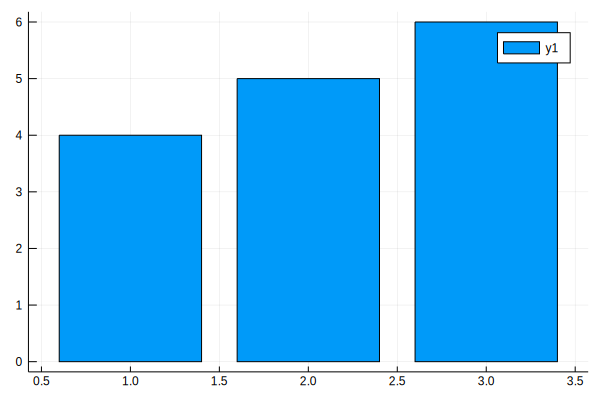

In [176]:
bar([(1,4),(2,5),(3,6)])

In [180]:
using StatsPlots

ArgumentError: ArgumentError: Package StatsPlots not found in current path:
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.
